# "Linear" Models!

We will look at the 3 most commonly used linear models implemented in sklearn:

## Support Vector Machines
* User's Guide - http://scikit-learn.org/stable/modules/svm.html
* API - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

SVC is the support vector classifier, but there are other classes for a linearsvc and "Nu"svc.  The training points closest to the boundary are called the **support vectors** and these are used specially to adjust the margins.  SVC training minimizes weight vector plus a constant C times margin erros (Flach eq 7.11 and pgs 216-219, "Soft Margin SVM").     Has the ability to use non-linear **kernels** to make decision boundaries that aren't just straight lines!

## Logistic regression     
* User's Guide - http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
* API - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Confusingly named, since it does classification and not regression.  Very similar to linear SVC.  Better at finding probabilites on large datasets than SVC. Less fancy, but that's not always a bad thing...


## Stochastic Gradient Descent
* User's Guide - http://scikit-learn.org/stable/modules/sgd.html
* API - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

SGD is efficient for huge datasets, and also the basis for **neural networks**.  The method is explain in Flach section 7.2 as the **Perceptron**.  (In sklearn, the perceptron class is a special case of SGD).  Training occurs by updating the weights for each training point (whereas the other two require the full training set, which is why SGD is far more efficient in speed and memory).  


***
# Demonstration

Mostly from: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm, linear_model, datasets

In [56]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [73]:
# Following the same data procedure from Tutorial 5
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          linear_model.LogisticRegression(C=C),
          linear_model.SGDClassifier(max_iter=1000, tol=1e-4),
          svm.SVC(kernel='poly', degree=2, C=C),
          svm.SVC(kernel='poly', degree=3, C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C)
         )
models = (clf.fit(X, y) for clf in models)

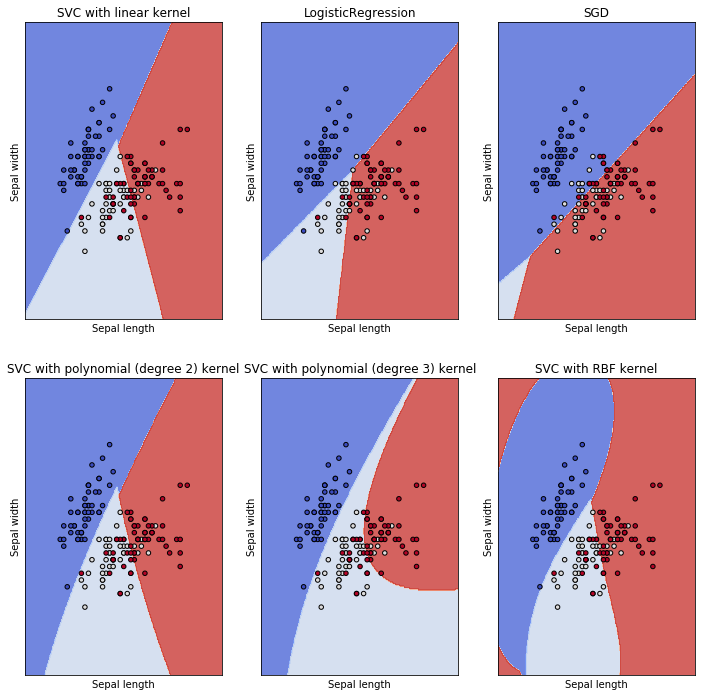

In [74]:
# Plot the Boundaries!
titles = ('SVC with linear kernel',
           'LogisticRegression',
          'SGD',
          'SVC with polynomial (degree 2) kernel',
          'SVC with polynomial (degree 3) kernel',
         'SVC with RBF kernel'
          
         )

# Set-up 2x2 grid for plotting.
fig = plt.figure(figsize=(12,12))
#sub = plt.subplots(3, 2)
#plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

i=1
for clf, title in zip(models, titles):
    ax = plt.subplot(2,3,i)     
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    i=i+1
    
plt.show()